# Notebook for analysing results 

Some basic plots and t-tests

In [29]:
import math
import time
import itertools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [14]:
solvers = [
    "random_search",
    "hill_climber",
    "genetic_algorithm",
    # "particle_swarm_optimisation"
]

def solvers_argss(solver, budget):
    d = {
        "random_search": 
        {'n_generation': budget},
        "hill_climber": 
        {'n_generation': budget},
        "genetic_algorithm": 
        {'n_generation': int(math.sqrt(budget)), 
         'population_size': int(budget / int(math.sqrt(budget)))},
        "particle_swarm_optimisation": 
        {'n_iteration': int(math.sqrt(budget) / 4), 
         'n_particles': int(budget / (math.sqrt(budget) / 4))}
    }
    result = d[solver]
    result['return_history'] = True
    return result

In [15]:
problems_sizess_budgetss_ctors = [
        # each row is (problem_name, sizes, constructor fn given only size)
        ('OneMax', (8, 16, 32), (50, 200, 1000), (lambda s: OneMax(s))),
        ('HelloWorld', (8, 16, 32), (500, 2000, 6000), (lambda s: HelloWorld(target='A'*s))),
        ('Sphere', (8, 16, 32), (100, 500, 5000), (lambda s: Sphere(s))),
        ('TSP', (8, 16, 24), (5000, 50000, 100000), (lambda s: TSP(N=s))), 
        ('kTSP', (20, 40, 60), (10000, 30000, 100000), (lambda s: kTSP(N=s, k=s // 4))), # choose k cities from N
        ('Assignment', (10, 20, 30), (10000, 30000, 100000), (lambda s: Assignment(num_agents=s))),
        ('SymbolicRegression', (6, 9, 12), (8000, 20000, 100000), (lambda s: SymbolicRegression(s*20, s))), 
        ('GrammaticalEvolution', (3, 6, 9), (2000, 10000, 30000), (lambda s: GrammaticalEvolution(s*20, s))), 
        ('NeuralNetwork', (2, 4, 6), (3000, 10000, 50000), (lambda s: NeuralNetwork(s, int(s*1.5), s, s*20))) # s*1.5 is the max_hidden
]

In [31]:
generators = {
    "TSP": ['tsp_gen_native', 'tsp_gen_knuth', 'tsp_gen_pmx'],
    "kTSP": ['ktsp_gen_native', 'ktsp_gen_sim_knuth', 'ktsp_gen_sim_remove'],
    "Assignment": ['gap_gen_native', 'gap_gen_sim']
}

In [16]:
crossovers = ['crossover_one_point_ind', 'crossover_uniform_ind']

In [18]:
df_seq = pd.read_csv("outputs/results_2025_01_15_seq_native.csv", index_col=0)

In [19]:
df_seq.shape

(11520, 15)

In [21]:
#      2 problems, 3 sizes, (3 solvers and for GA only 2 mut types = 4), 2 dist_types, 2 name_types, 3 generators, 30 reps # 2 problems with 3 generators
# PLUS 1 problem , 3 sizes, (3 solvers and for GA only 2 mut types = 4), 2 dist_types, 2 name_types, 2 generators, 30 reps # 1 problem with 2 generators
len(df_seq) == 2 * 3 * 4 * 2 * 2 * 3 * 30 + 1 * 3 * 4 * 2 * 2 * 2 * 30 


True

In [22]:
def rename_problems_solvers_size_cats(df):

    renames = {
        'Assignment': 'GAP'
    }

    for k in renames:
        df['problem'] = df['problem'].str.replace(k, renames[k])

    renames = {
        'particle_swarm_optimisation': 'PS',
        'random_search': 'RS',
        'genetic_algorithm': 'GA',
        'hill_climber': 'HC',
    }

    for k in renames:
        df['solver'] = df['solver'].str.replace(k, renames[k])

    renames = {
        'small': 'S',
        'medium': 'M',
        'large': 'L'
    }

    for k in renames:
        df['size_cat'] = df['size_cat'].str.replace(k, renames[k])
    return df

df_seq = rename_problems_solvers_size_cats(df_seq)


In [40]:
def make_dotplot(df, problem):

    # get this problem, large size only
    df = df[(df['problem'] == problem) & (df['size_cat'] == 'L')]

    def create_group(row):
        s = f"{row['solver']}"
        if row['solver'] == 'GA':
            s += (f"_{row['xover']}")
        s += (f"_{row['dist_type']}_{row['name_type']}")
        return s

    # Create combined categories for x-axis
    df['group'] = df.apply(create_group, axis=1)

    # Set figure size
    plt.figure(figsize=(10, 6))

    # Create violin plot
    sns.stripplot(data=df, 
                y='norm_fx',
                x='group',
                hue='generator',
                )
    
    plt.xlabel("")

    # Rotate x labels for readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()
    # plt.savefig(f"outputs/seq_native_{problem}.pdf")
    plt.close()

/var/folders/yg/h7gctm5d43q02026dgq6w0wh0000gn/T/ipykernel_55976/991686727.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df.apply(create_group, axis=1)


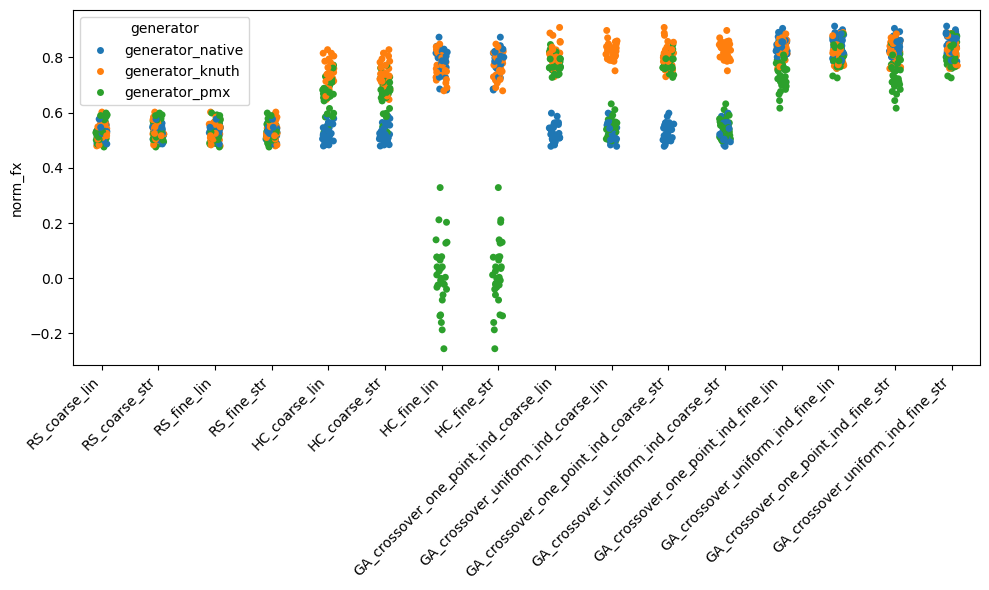

/var/folders/yg/h7gctm5d43q02026dgq6w0wh0000gn/T/ipykernel_55976/991686727.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df.apply(create_group, axis=1)


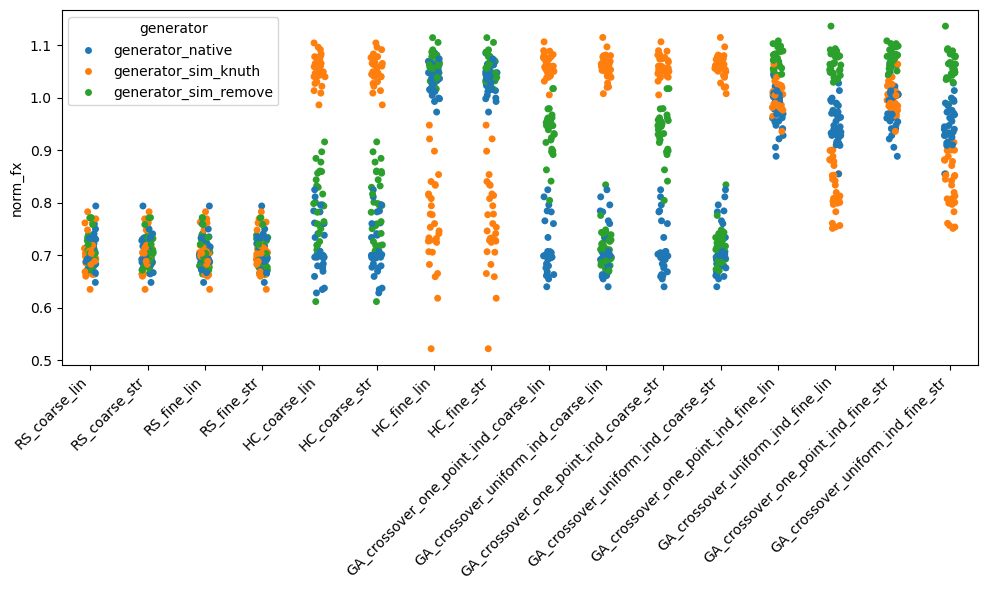

/var/folders/yg/h7gctm5d43q02026dgq6w0wh0000gn/T/ipykernel_55976/991686727.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df.apply(create_group, axis=1)


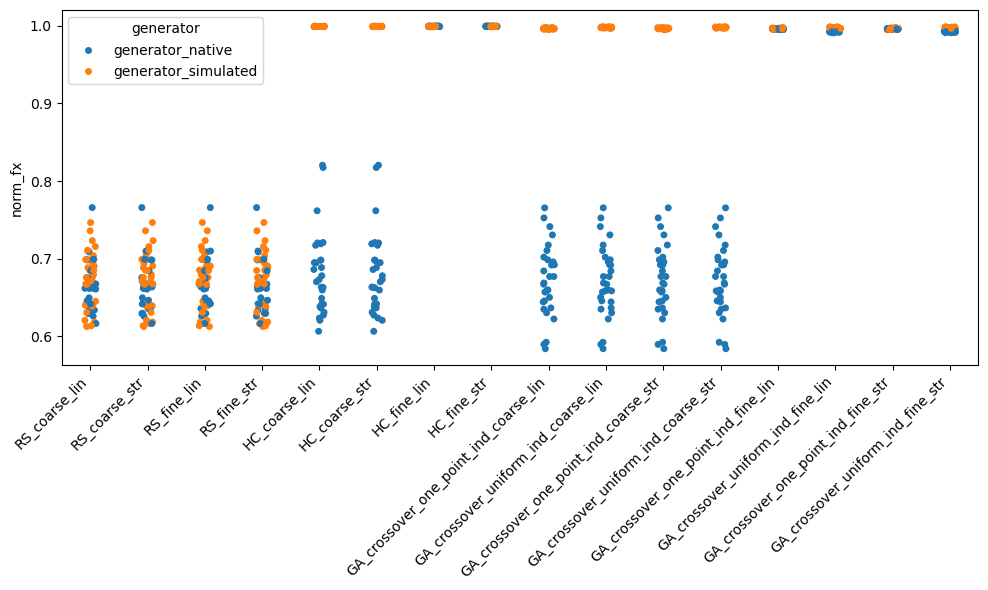

In [41]:
for problem in "TSP", "kTSP", "GAP":
    make_dotplot(df_seq, problem)

In [42]:

df = df_seq

df = df[
    (df['problem'] == 'GAP') &
    (df['size_cat'] == 'L') &
    (df['solver'] == 'GA') & 
    (df['dist_type'] == 'fine') & 
    (df['name_type'] == 'str') & 
    (df['xover'] == 'crossover_uniform_ind')]

In [43]:
df.shape

(60, 15)

In [44]:
a = df[df['generator'] == 'generator_knuth']
a = df[df['generator'] == 'generator_native']

print(f"{a['norm_fx'].mean()} versus {b['norm_fx'].mean()}")
print(scipy.stats.ttest_ind(a['norm_fx'], b['norm_fx'], alternative='less'))

0.9926961907640215 versus 0.9974787252615075
TtestResult(statistic=-25.095266822690427, pvalue=3.884226255206756e-33, df=58.0)


In [ ]:
# TODO: automate the above
# TODO: the figures are not being saved correctly, but appear ok above